In [1]:
# PyTorch
from torchvision import transforms, datasets, models
import torch
from torch import optim
from torch.utils.data import DataLoader, sampler
import torch.nn as nn


In [2]:
model = models.vgg16(pretrained=True)
model

/Users/edoardotavassi/Documents/coding_projects/CBIS_DDSM_BreastCancer/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/edoardotavassi/Documents/coding_projects/CBIS_DDSM_BreastCancer/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [3]:
model.classifier[6]

Linear(in_features=4096, out_features=1000, bias=True)

In [4]:
from torchsummary import summary
summary(model, input_size=(3, 224, 224), batch_size=3, device='cpu')


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [3, 64, 224, 224]           1,792
              ReLU-2          [3, 64, 224, 224]               0
            Conv2d-3          [3, 64, 224, 224]          36,928
              ReLU-4          [3, 64, 224, 224]               0
         MaxPool2d-5          [3, 64, 112, 112]               0
            Conv2d-6         [3, 128, 112, 112]          73,856
              ReLU-7         [3, 128, 112, 112]               0
            Conv2d-8         [3, 128, 112, 112]         147,584
              ReLU-9         [3, 128, 112, 112]               0
        MaxPool2d-10           [3, 128, 56, 56]               0
           Conv2d-11           [3, 256, 56, 56]         295,168
             ReLU-12           [3, 256, 56, 56]               0
           Conv2d-13           [3, 256, 56, 56]         590,080
             ReLU-14           [3, 256,

In [5]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [6]:
#drop the lasty layer
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x

model.classifier= Identity()


In [7]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

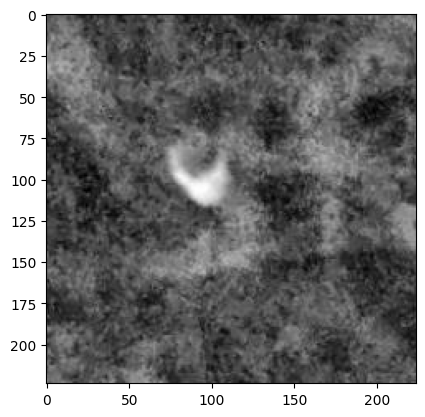

In [8]:
# single image

from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

img = Image.open('../data/processed/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.429733613616775521134752460435327912/1-295.jpg')

plt.imshow(img, cmap='gray')
plt.show()


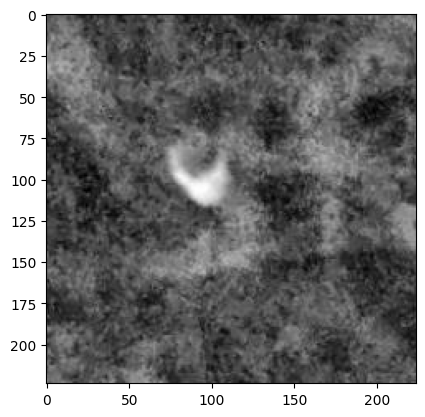

tensor([[0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<ViewBackward0>)

In [9]:
#test the model
model.eval()
#tensor without transformation

transform = transforms.Compose([
    transforms.ToTensor(),
])

img_tensor = transform(img)
plt.imshow(img_tensor.permute(1, 2, 0), cmap='gray')
plt.show()

img_tensor = img_tensor.unsqueeze(0)
output = model(img_tensor)
output



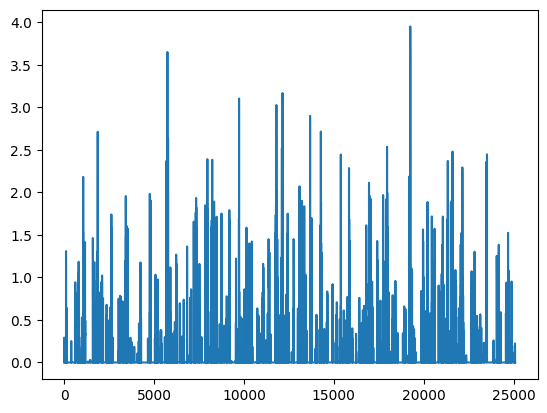

In [10]:
#plot the output 
import numpy as np
import matplotlib.pyplot as plt

output = output.detach().numpy()
output = np.squeeze(output)
plt.plot(output)
plt.show()




In [11]:
import timm

class ViTPlusPlus(nn.Module):
    def __init__(self, img_size=224, patch_size=16, num_patches=196, embed_dim=512, num_blocks=2, num_heads=8):
        super(ViTPlusPlus, self).__init__()
        
        self.patch_embed = nn.Conv2d(3, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.num_patches = (img_size // patch_size) ** 2
        
        self.position_embed = nn.Parameter(torch.zeros(1, self.num_patches, embed_dim))
        self.dropout = nn.Dropout(0.1)
        
        self.transformer_encoder = nn.ModuleList([
            nn.TransformerEncoderLayer(
                d_model=embed_dim,
                nhead=num_heads,
                dim_feedforward=embed_dim * 4,
                dropout=0.1,
                activation='gelu'
            ) for _ in range(num_blocks)
        ])
        
        self.norm = nn.LayerNorm(embed_dim)
        self.global_pooling = nn.AdaptiveAvgPool1d(1)
    
    def forward(self, x):
        # Patch embedding
        x = self.patch_embed(x)  # Shape: (batch_size, embed_dim, num_patches ** 0.5, num_patches ** 0.5)
        x = x.flatten(2)  # Shape: (batch_size, embed_dim, num_patches)
        x = x.transpose(1, 2)  # Shape: (batch_size, num_patches, embed_dim)
        
        # Add position embeddings
        x = x + self.position_embed
        x = self.dropout(x)
        
        # Pass through Transformer encoder layers
        for layer in self.transformer_encoder:
            x = layer(x)
        
        # Layer normalization
        x = self.norm(x)
        
        # Global pooling
        x = x.permute(0, 2, 1)
        x = self.global_pooling(x)
        x = torch.flatten(x, 1)
        
        return x

/Users/edoardotavassi/Documents/coding_projects/CBIS_DDSM_BreastCancer/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
class CNNBranch(nn.Module): # VGG16 Working
    def __init__(self):
        super(CNNBranch, self).__init__()
        vgg = models.vgg16(pretrained=True)
        self.features = vgg.features
        self.global_pooling = nn.AdaptiveAvgPool2d((1, 1))
    
    def forward(self, x):
        x = self.features(x)
        x = self.global_pooling(x)
        x = torch.flatten(x, 1)
        return x

In [13]:
class HybridModel(nn.Module):
    def __init__(self, num_classes=1, embed_dim=512):
        super(HybridModel, self).__init__()
        self.cnn_branch = CNNBranch()
        self.vit_branch = ViTPlusPlus(embed_dim=embed_dim)
        self.fc = nn.Sequential(
            nn.Linear(512 + embed_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        cnn_features = self.cnn_branch(x)
        vit_features = self.vit_branch(x)
        features = torch.cat((cnn_features, vit_features), dim=1)
        out = self.fc(features)
        return out

In [14]:
model = HybridModel()
#ytest the model
model.eval()
#tensor without transformation

transform = transforms.Compose([
    transforms.ToTensor(),
])

img_tensor = transform(img)

img_tensor = img_tensor.unsqueeze(0)
output = model(img_tensor)
output

/Users/edoardotavassi/Documents/coding_projects/CBIS_DDSM_BreastCancer/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/edoardotavassi/Documents/coding_projects/CBIS_DDSM_BreastCancer/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


tensor([[0.5344]], grad_fn=<SigmoidBackward0>)

In [15]:
import pandas as pd
calc_data_df = pd.read_csv('../data/processed/CBIS-DDSM/calc_dicom_preprocessing.csv')
calc_data_df.head()

,subject_id,pathology,original_image,out_image
0,Calc-Test_P_00562_LEFT_CC_2,BENIGN_WITHOUT_CALLBACK,../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...,../data/processed/CBIS-DDSM/jpeg/1.3.6.1.4.1.9...
1,Calc-Training_P_00181_RIGHT_CC_1,BENIGN,../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...,../data/processed/CBIS-DDSM/jpeg/1.3.6.1.4.1.9...
2,Calc-Training_P_01015_LEFT_CC_1,MALIGNANT,../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...,../data/processed/CBIS-DDSM/jpeg/1.3.6.1.4.1.9...
3,Calc-Training_P_01497_LEFT_CC_1,BENIGN,../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...,../data/processed/CBIS-DDSM/jpeg/1.3.6.1.4.1.9...
4,Calc-Test_P_00857_RIGHT_CC_1,MALIGNANT,../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...,../data/processed/CBIS-DDSM/jpeg/1.3.6.1.4.1.9...


In [16]:
#change BENIGN_WITHOUT_CALLBACK	with BENIGN
calc_data_df['pathology'] = calc_data_df['pathology'].replace('BENIGN_WITHOUT_CALLBACK', 'BENIGN')
calc_data_df['pathology'].value_counts()

pathology
BENIGN       1198
MALIGNANT     673
Name: count, dtype: int64

In [17]:
#change MALIGNANT to 0 and BENIGN to 1
calc_data_df['pathology'] = calc_data_df['pathology'].replace('MALIGNANT', 0)
calc_data_df['pathology'] = calc_data_df['pathology'].replace('BENIGN', 1)

calc_data_df['pathology'].value_counts()

/var/folders/y0/8vyv832s3696sxgrt2_3v0k40000gn/T/ipykernel_96223/1938293281.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calc_data_df['pathology'] = calc_data_df['pathology'].replace('BENIGN', 1)


pathology
1    1198
0     673
Name: count, dtype: int64

In [18]:
X = calc_data_df['out_image']
y = calc_data_df['pathology']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape



((1496,), (375,))

In [19]:
def get_image_tensor(image_path):
    img = Image.open(image_path)
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    img_tensor = transform(img)
    img_tensor = img_tensor.unsqueeze(0)
    return img_tensor

def get_image_tensors(image_paths):
    img_tensors = []
    for image_path in image_paths:
        img_tensor = get_image_tensor(image_path)
        img_tensors.append(img_tensor)
    return img_tensors

In [20]:
#tranform X_train and y_train into a df
train_df = pd.concat([X_train, y_train], axis=1)
#rename the columns
train_df.columns = ['X_train', 'y_train']
train_df.head()


,X_train,y_train
576,../data/processed/CBIS-DDSM/jpeg/1.3.6.1.4.1.9...,0
334,../data/processed/CBIS-DDSM/jpeg/1.3.6.1.4.1.9...,0
1392,../data/processed/CBIS-DDSM/jpeg/1.3.6.1.4.1.9...,0
863,../data/processed/CBIS-DDSM/jpeg/1.3.6.1.4.1.9...,1
1819,../data/processed/CBIS-DDSM/jpeg/1.3.6.1.4.1.9...,1


In [21]:
from torch.utils.data import Dataset

class ImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
    
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]  # Assuming the first column contains image paths
        label = self.dataframe.iloc[idx, 1]  # Assuming the second column contains labels
        image = Image.open(img_path)
        
        if self.transform:
            image = self.transform(image)
        
        return image, torch.tensor(label, dtype=torch.float32)
    
def create_dataloader(train_df, batch_size=32):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Ensure the images are the correct size
        transforms.ToTensor(),
    ])
    
    dataset = ImageDataset(train_df, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    return dataloader

In [22]:
dataloader = create_dataloader(train_df, batch_size=10)

In [23]:
for (images, labels) in dataloader:
    print(labels)
    

tensor([1., 0., 0., 1., 1., 0., 1., 1., 1., 1.])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])
tensor([0., 1., 0., 0., 1., 1., 1., 1., 0., 1.])
tensor([1., 1., 1., 1., 1., 1., 1., 0., 0., 0.])
tensor([1., 1., 1., 0., 0., 0., 0., 0., 0., 0.])
tensor([1., 0., 1., 0., 0., 1., 1., 0., 0., 1.])
tensor([0., 1., 1., 1., 1., 1., 1., 1., 0., 1.])
tensor([0., 1., 1., 1., 1., 1., 1., 0., 1., 1.])
tensor([1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])
tensor([1., 1., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([1., 1., 1., 1., 0., 1., 0., 1., 1., 1.])
tensor([1., 1., 1., 1., 1., 1., 0., 1., 1., 0.])
tensor([0., 1., 1., 1., 0., 1., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
tensor([1., 1., 0., 1., 0., 0., 1., 0., 1., 1.])
tensor([0., 0., 0., 1., 1., 1., 1., 0., 1., 0.])
tensor([1., 0., 1., 1., 1., 1., 0., 1., 0., 0.])
tensor([1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 1.])
tensor([1., 0., 0., 1., 1., 0., 1., 1., 1., 1.])
tensor([0., 1., 0., 

In [24]:
model = HybridModel()

#test the model
model.eval()
#tensor without transformation

transform = transforms.Compose([
    transforms.ToTensor(),
])

img_tensor = transform(img)

img_tensor = img_tensor.unsqueeze(0)

output = model(img_tensor)
output

/Users/edoardotavassi/Documents/coding_projects/CBIS_DDSM_BreastCancer/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/edoardotavassi/Documents/coding_projects/CBIS_DDSM_BreastCancer/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


tensor([[0.5695]], grad_fn=<SigmoidBackward0>)

In [25]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

def train_model(model, dataloader, criterion, optimizer, num_epochs=10, device='cuda'):
    loss_history = []
    acc_history = []
    model.to(device)
    model.train()  # Set the model to training mode
    
    # Initialize the live plot
    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        # Initialize the progress bar for each epoch
        progress_bar = tqdm(enumerate(dataloader), total=len(dataloader), desc=f'Epoch {epoch+1}/{num_epochs}')
        
        for i, (images, labels) in progress_bar:
            images, labels = images.to(device), labels.to(device)
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)  # Model outputs (shape: [batch_size, 1])
            outputs = outputs.view(-1)  # Flatten to [batch_size]
            labels = labels.view(-1)  # Flatten labels to [batch_size]
            
            # Compute the loss
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            # Statistics
            running_loss += loss.item()
            loss_history.append(loss.item())
            acc_history.append((outputs.round() == labels).float().mean().item())
            
            predicted = outputs.round()  # Round the output to get predicted labels (0 or 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            
            # Update progress bar description with current loss and accuracy
            progress_bar.set_postfix({'Loss': running_loss / (i + 1), 'Accuracy': 100 * correct / total})
        
        epoch_loss = running_loss / len(dataloader)
        epoch_acc = 100 * correct / total
        
        print(f"\nEpoch [{epoch+1}/{num_epochs}], Final Loss: {epoch_loss:.4f}, Final Accuracy: {epoch_acc:.2f}%")
        
        # Update live plot
        ax[0].cla()
        ax[0].plot(loss_history, label='Loss')
        ax[0].set_title('Loss Over Time')
        ax[0].set_xlabel('Batch')
        ax[0].set_ylabel('Loss')
        ax[0].legend()

        ax[1].cla()
        ax[1].plot(acc_history, label='Accuracy')
        ax[1].set_title('Accuracy Over Time')
        ax[1].set_xlabel('Batch')
        ax[1].set_ylabel('Accuracy')
        ax[1].legend()

        plt.pause(0.001)  # Pause to update the figure
    
    plt.ioff()  # Turn off interactive mode
    plt.show()  # Keep the final plot displayed
    
    print("Training complete.")
    return loss_history, acc_history

Epoch 1/10:   0%|          | 0/150 [00:03<?, ?it/s]


KeyboardInterrupt: 

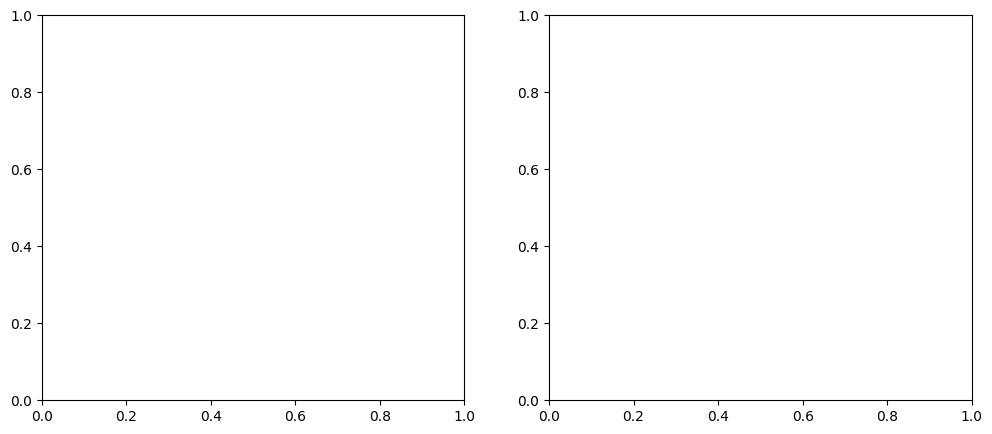

In [26]:
model = HybridModel(num_classes=1)  # Assuming you've defined the model as shown earlier
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
# Assuming X_train contains paths to training images and y_train contains the labels
# Train the model
loss_h, acc_h = train_model(model, dataloader, criterion, optimizer, num_epochs=10, device='cpu')

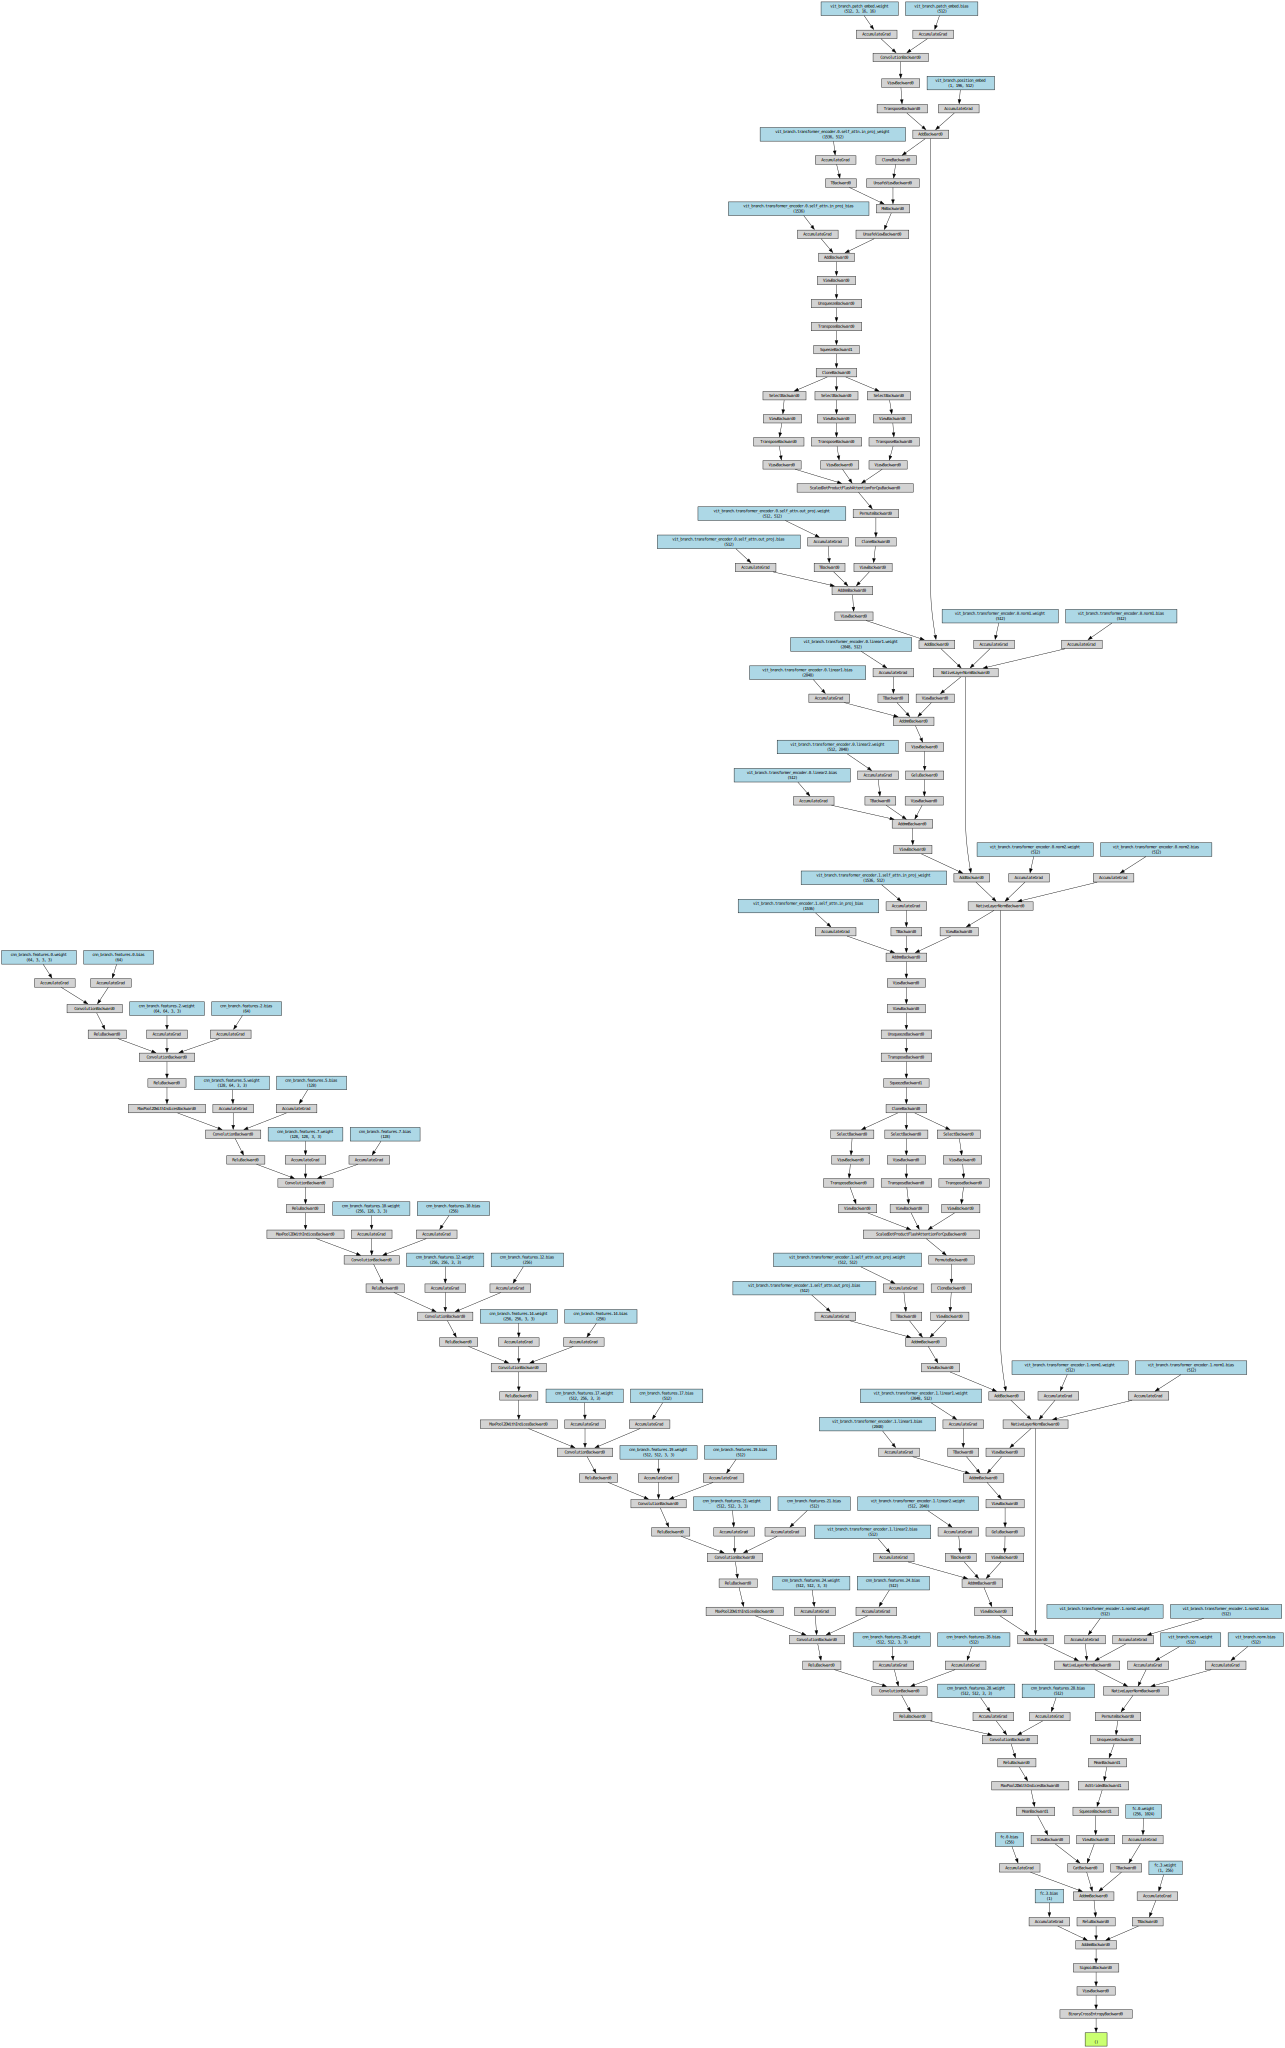

In [32]:
#visualzie model architecture in a graph format without the gradients
import torchviz
from torchviz import make_dot

# Assuming you have a model named 'model'
images, labels = next(iter(dataloader))
model.eval()
output = model(images)
output = output.view(-1)
labels = labels.view(-1)
loss = criterion(output, labels)
loss.backward()

make_dot(loss, params=dict(model.named_parameters()))


